<img src='../res/pandas_ico.png'>

# pandas学习
https://wklchris.github.io/Py3-pandas.html

https://bookdata.readthedocs.io/en/latest/base/01_pandas.html

------
#### % matplotlib inlin的功能
* 在使用jupyter notebook 或者 jupyter qtconsole的时候，经常会用到%matplotlib inline。
* 其作用就是在你调用plot()进行画图或者直接输入Figure的实例对象的时候，会自动的显示并把figure嵌入到console中。
#### 注意的地方
* 但有一个不太方便的地方，当你调用fig1 = plt.figure(1); 如果再次调用plt.figure(1)的时候会产生新的Figure实例对象，而且每次plt.gca()或者plt.gcf()都会产生不同的对象。
* 如果不加上%maplotlib inline 的话，每次figure的显示都需要plt.show();
----

---
# 目录
## 1. [数据结构DataFrame和Series](#1.数据结构DataFrame和Series)
## 2. [pd.date_range函数原型](#2.pd.date_range函数原型)
## 3. [reindex函数原型](#3.reindex函数原型)
## 4. [基础操作](#4.基础操作)
## 5. [value和index排序](#5.value和index排序)

## 6. [rank函数原型(排名)](#6.rank函数原型(排名))
## 7. [选取](#7.选取)

* [列选取](#列选取)
* [行选取](#行选取)
* [loc按照标签](#loc按照标签)
* [at单元素选取](#at单元素选取)

## 8. [新增一列](#8.新增一列)
## 9. [DataFrame复制](#9.DataFrame复制)
## 10. [缺失值处理](#10.缺失值处理)

* [丢弃缺失值](#丢弃缺失值)
* [替换NaN](#替换NaN)
* [df.replace()详解](#df.replace()详解)

## 11. [表统计与整合](#11.表统计与整合)
## 12. [其他常用的统计方法](#12.其他常用的统计方法)
## 13. [数据移动DataFrame.shift()](#13.数据移动DataFrame.shift())
## 14. [行求差pd.DataFrame.diff()](#14.行求差pd.DataFrame.diff())
## 15. [数据频率统计](#15.数据频率统计)

## 16. [apply、map和applymap原型](#16.apply、map和applymap原型)

* [apply原型](#apply原型)
* [applymap原型](#applymap原型)
* [map原型](#map原型)

## 17. [表格拼接](#17.表格拼接)

* [pd.concat原型(沿轴将多个对象堆叠到一起)](#pd.concat原型(沿轴将多个对象堆叠到一起))
* [append原型](#append原型)
* [merge原型(通过键拼接列)](#merge原型(通过键拼接列))
* [join原型](#join原型)
* [join索引连接DataFrame](#join索引连接DataFrame)
* [join指定的列连接DataFrame](#join指定的列连接DataFrame)
* [join右连接](#join右连接)
* [join外连接](#join外连接)

## 18. [pivot_table原型(数据透视表)](#18.pivot_table原型(数据透视表))
## 19. [cumsum原型(样本值的累计和)](#19.cumsum原型(样本值的累计和))
## 20. [数据读写](#20.数据读写)

* [数据读取](#数据读取)
* [数据写入](#数据写入)

---

---
# 1.数据结构DataFrame和Series

1. **Series** 是pandas两大数据结构中（DataFrame，Series）的一种。
    * Series对象本质上是一个NumPy的数组，因此NumPy的数组处理函数可以直接对Series进行处理。但是Series除了可以使用位置作为下标存取元素之外，还可以使用标签下标存取元素，这一点和字典相似。每个Series对象实际上都由两个数组组成：
    * index: 它是从NumPy数组继承的Index对象，保存标签信息。
    * values: 保存值的NumPy数组。

2. **DataFrame**是一个表格型的数据结构
    * 它含有一组有序的列（类似于 index），每列可以是不同的值类型（不像 ndarray 只能有一个 dtype）。基本上可以把 DataFrame 看成是共享同一个 index 的 Series 的集合。

- - -
# 2.pd.date_range函数原型
``` python
pandas.date_range(start=None, end=None, periods=None, freq=’D’, tz=None, normalize=False, name=None, closed=None, **kwargs)
``` 

**参数说明**

* **start**：string或datetime-like，默认值是None，表示日期的起点。
  
* **end**：string或datetime-like，默认值是None，表示日期的终点。
    
* **periods**：integer或None，默认值是None，表示你要从这个函数产生多少个日期索引值；如果是None的话，那么start和end必须不能为None。
    
* **freq**：string或DateOffset，默认值是’D’，表示以自然日为单位，这个参数用来指定计时单位，比如’5H’表示每隔5个小时计算一次。
    
* **tz**：string或None，表示时区，例如：’Asia/Hong_Kong’。
    
* **normalize**：bool，默认值为False，如果为True的话，那么在产生时间索引值之前会先把start和end都转化为当日的午夜0点。
    
* **name**：str，默认值为None，给返回的时间索引指定一个名字。
    
* **closed**：string或者None，默认值为None，表示start和end这个区间端点是否包含在区间内，可以有三个值，’left’表示左闭右开区间，’right’表示左开右闭区间，None表示两边都是闭区间。
* **return**: DatetimeIndex

举个例子看看：

    pd.date_range(start='20160101',end='20160601')

结果如下：
``` python
    DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04'...'2016-05-31', '2016-06-01'],dtype='datetime64[ns]', length=153, freq='D')
```

In [1]:
% matplotlib inline
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" # 可同时输出多个结果
# 复制一张表，使用pd.read_clipboard()可以读取
import pandas as pd
import numpy as np
s = pd.Series([i*2 for i in range(1,11)])
type(s)
# 作用就是产生一个DatetimeIndex，就是时间序列数据的索引
datas = pd.date_range("20181130", periods=8) 
# np.random.randn返回一个或一组服从标准正态分布的随机样本值
# 返回一个或一组服从“0~1”均匀分布的随机样本值。随机样本取值范围是[0,1)，不包括1
df = pd.DataFrame(np.random.randn(8, 5), index=datas, columns=list('ABCDE'))
df

,A,B,C,D,E
2018-11-30,2.189182,0.366147,-0.028394,-0.277079,-0.816034
2018-12-01,2.507303,1.192157,1.200366,-0.791091,-0.353033
2018-12-02,0.446150,0.774721,-0.334105,-1.826460,-2.051212
2018-12-03,-0.763307,-0.509413,-0.322509,1.024529,0.145940
2018-12-04,1.038050,1.668846,2.830364,0.251229,-0.422864
2018-12-05,-0.033283,-0.348994,1.095271,0.131794,0.450227
2018-12-06,1.802930,-1.335800,-1.074597,-1.464042,0.146053
2018-12-07,-0.072130,0.219638,-0.715134,-0.289620,-1.113579


In [2]:
df = pd.DataFrame({'A':1, 
                   "B":pd.Timestamp("20181130"),
                   'C':pd.Series(1, index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4, dtype='float32'), 
                   'E':pd.Categorical(['poloce','student','teacher','doctor'])})
df

,A,B,C,D,E
0,1,2018-11-30,1.0,3.0,poloce
1,1,2018-11-30,1.0,3.0,student
2,1,2018-11-30,1.0,3.0,teacher
3,1,2018-11-30,1.0,3.0,doctor


---
# 3.reindex函数原型
``` python
pd.DataFrame.reindex(self, labels=None, index=None, columns=None, axis=None, method=None, copy=True, level=None, fill_value=nan, limit=None, tolerance=None)
```
**参数说明**
* **index**: 用作索引的新序列
* **method**: {'backfill', 'bfill', 'pad', 'ffill', None} 参数用于指定插值（填充）方式，当没有给出时，自动用 fill_value 填充，默认为 NaN（ffill = pad，bfill = back fill，分别指插值时向前还是向后取值）
* **fill_value**: 在重新索引的过程中，需要引入缺失值时使用的代替值
* **limit**: 前向或后向填充时的最大填充量
* **level**: 在MultiIndex的指定级别上匹配简单索引，否则选取其子集
* **copy**: 默认为True，无论如何都复制，如果为False，则新旧相等就不复制

``` python
pd.Series.reindex(self, index=None, **kwargs)
```

In [3]:
ser = pd.Series([4.5,7.2,-5.3,3.6],index=['d','b','a','c'])
ser
ser.reindex(['a','b','c','d'],fill_value=0)

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

a   -5.3
b    7.2
c    3.6
d    4.5
dtype: float64

---
# 4.基础操作

In [4]:
df = pd.DataFrame(np.random.randn(8, 5), index=datas, columns=list('ABCDE'))
df.head(3) # 用于查看数据框头部 5 行的数据。也可传入数字指定查看的行数 
df.tail(3) # 用于查看数据框尾部 5 行的数据。也可传入数字指定查看的行数

,A,B,C,D,E
2018-11-30,-0.778901,0.183915,0.690492,-1.855662,-0.273473
2018-12-01,0.615940,0.803807,2.136455,0.548571,-0.509892
2018-12-02,-0.870519,2.063170,-0.198829,-1.046411,0.202759


,A,B,C,D,E
2018-12-05,0.292186,-0.067455,0.366480,-0.533598,-1.523943
2018-12-06,1.679119,1.154118,-0.289215,0.573627,-0.977869
2018-12-07,-0.437701,-0.233111,-0.448099,-0.541755,-0.708477


In [5]:
df.index # 返回DataFrame的索引

DatetimeIndex(['2018-11-30', '2018-12-01', '2018-12-02', '2018-12-03',
               '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df.values # 返回DataFrame的数据部分
df.T # DataFrame转置

array([[-0.77890101,  0.18391537,  0.69049169, -1.85566172, -0.27347346],
       [ 0.61593951,  0.80380746,  2.13645537,  0.54857113, -0.50989201],
       [-0.8705193 ,  2.06317048, -0.19882932, -1.04641149,  0.20275932],
       [-0.90775341,  0.24690026, -1.21263968, -1.34326243,  0.59368783],
       [ 0.80197993, -0.89563575, -0.74115741,  0.21557498, -0.04882234],
       [ 0.29218635, -0.06745509,  0.36647953, -0.53359774, -1.52394317],
       [ 1.67911933,  1.15411804, -0.28921486,  0.57362716, -0.97786882],
       [-0.43770057, -0.23311063, -0.44809867, -0.54175521, -0.70847724]])

,2018-11-30 00:00:00,2018-12-01 00:00:00,2018-12-02 00:00:00,2018-12-03 00:00:00,2018-12-04 00:00:00,2018-12-05 00:00:00,2018-12-06 00:00:00,2018-12-07 00:00:00
A,-0.778901,0.615940,-0.870519,-0.907753,0.801980,0.292186,1.679119,-0.437701
B,0.183915,0.803807,2.063170,0.246900,-0.895636,-0.067455,1.154118,-0.233111
C,0.690492,2.136455,-0.198829,-1.212640,-0.741157,0.366480,-0.289215,-0.448099
D,-1.855662,0.548571,-1.046411,-1.343262,0.215575,-0.533598,0.573627,-0.541755
E,-0.273473,-0.509892,0.202759,0.593688,-0.048822,-1.523943,-0.977869,-0.708477


In [7]:
df.describe() # 查看数据的分布情况，返回变量和观测的数量、缺失值和唯一值的数目、平均值、分位数等相关信息

,A,B,C,D,E
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.049294,0.406964,0.037936,-0.497864,-0.405754
std,0.947781,0.915396,1.035636,0.895587,0.675512
min,-0.907753,-0.895636,-1.212640,-1.855662,-1.523943
25%,-0.801806,-0.108869,-0.521363,-1.120624,-0.775825
50%,-0.072757,0.215408,-0.244022,-0.537676,-0.391683
75%,0.662450,0.891385,0.447483,0.298824,0.014073
max,1.679119,2.063170,2.136455,0.573627,0.593688


---
# 5.value和index排序

In [8]:
df.sort_values(by='C') # 按'C'列进行升序排序

,A,B,C,D,E
2018-12-03,-0.907753,0.246900,-1.212640,-1.343262,0.593688
2018-12-04,0.801980,-0.895636,-0.741157,0.215575,-0.048822
2018-12-07,-0.437701,-0.233111,-0.448099,-0.541755,-0.708477
2018-12-06,1.679119,1.154118,-0.289215,0.573627,-0.977869
2018-12-02,-0.870519,2.063170,-0.198829,-1.046411,0.202759
2018-12-05,0.292186,-0.067455,0.366480,-0.533598,-1.523943
2018-11-30,-0.778901,0.183915,0.690492,-1.855662,-0.273473
2018-12-01,0.615940,0.803807,2.136455,0.548571,-0.509892


In [9]:
# 默认参数是 axis=0（重排行），ascending=True（升序）。支持 inplace 参数
df.sort_index(axis=1, ascending=False) 

,E,D,C,B,A
2018-11-30,-0.273473,-1.855662,0.690492,0.183915,-0.778901
2018-12-01,-0.509892,0.548571,2.136455,0.803807,0.615940
2018-12-02,0.202759,-1.046411,-0.198829,2.063170,-0.870519
2018-12-03,0.593688,-1.343262,-1.212640,0.246900,-0.907753
2018-12-04,-0.048822,0.215575,-0.741157,-0.895636,0.801980
2018-12-05,-1.523943,-0.533598,0.366480,-0.067455,0.292186
2018-12-06,-0.977869,0.573627,-0.289215,1.154118,1.679119
2018-12-07,-0.708477,-0.541755,-0.448099,-0.233111,-0.437701


---
# 6.rank函数原型(排名)

``` python
pd.Series.rank(self, axis=0, method='average', numeric_only=None, na_option='keep', ascending=True, pct=False)

pd.DataFrame.rank(self, axis=0, method='average', numeric_only=None, na_option='keep', ascending=True, pct=False)
```

**参数说明**

* **method**: 处理平级项，四个值可选：average, min, max, first(average: 在相等分组中，为各个值分配平均排名; min: 使用整个分组的最小排名; max: 使用整个分组的最大排名; first: 按值在原始数据中的出现顺序分配排名)

In [10]:
df
df.rank(method="first",ascending=False)

,A,B,C,D,E
2018-11-30,-0.778901,0.183915,0.690492,-1.855662,-0.273473
2018-12-01,0.615940,0.803807,2.136455,0.548571,-0.509892
2018-12-02,-0.870519,2.063170,-0.198829,-1.046411,0.202759
2018-12-03,-0.907753,0.246900,-1.212640,-1.343262,0.593688
2018-12-04,0.801980,-0.895636,-0.741157,0.215575,-0.048822
2018-12-05,0.292186,-0.067455,0.366480,-0.533598,-1.523943
2018-12-06,1.679119,1.154118,-0.289215,0.573627,-0.977869
2018-12-07,-0.437701,-0.233111,-0.448099,-0.541755,-0.708477


,A,B,C,D,E
2018-11-30,6.0,5.0,2.0,8.0,4.0
2018-12-01,3.0,3.0,1.0,2.0,5.0
2018-12-02,7.0,1.0,4.0,6.0,2.0
2018-12-03,8.0,4.0,8.0,7.0,1.0
2018-12-04,2.0,8.0,7.0,3.0,3.0
2018-12-05,4.0,6.0,3.0,4.0,8.0
2018-12-06,1.0,2.0,5.0,1.0,7.0
2018-12-07,5.0,7.0,6.0,5.0,6.0


---
# 7.选取
### 列选取

In [11]:
df['A'] # 选取单列：df['A'] 或者 df.A

2018-11-30   -0.778901
2018-12-01    0.615940
2018-12-02   -0.870519
2018-12-03   -0.907753
2018-12-04    0.801980
2018-12-05    0.292186
2018-12-06    1.679119
2018-12-07   -0.437701
Freq: D, Name: A, dtype: float64

In [12]:
df[['A','B']] # 选取多列：df[['A', 'B']]

,A,B
2018-11-30,-0.778901,0.183915
2018-12-01,0.615940,0.803807
2018-12-02,-0.870519,2.063170
2018-12-03,-0.907753,0.246900
2018-12-04,0.801980,-0.895636
2018-12-05,0.292186,-0.067455
2018-12-06,1.679119,1.154118
2018-12-07,-0.437701,-0.233111


### 行选取

In [13]:
df[:3] # 选取行：例如前三行 df[:3]

,A,B,C,D,E
2018-11-30,-0.778901,0.183915,0.690492,-1.855662,-0.273473
2018-12-01,0.615940,0.803807,2.136455,0.548571,-0.509892
2018-12-02,-0.870519,2.063170,-0.198829,-1.046411,0.202759


In [14]:
df['2018-11-30':'2018-12-03']

,A,B,C,D,E
2018-11-30,-0.778901,0.183915,0.690492,-1.855662,-0.273473
2018-12-01,0.615940,0.803807,2.136455,0.548571,-0.509892
2018-12-02,-0.870519,2.063170,-0.198829,-1.046411,0.202759
2018-12-03,-0.907753,0.246900,-1.212640,-1.343262,0.593688


### loc按照标签

In [15]:
df.loc[datas[0]] # 按照标签

A   -0.778901
B    0.183915
C    0.690492
D   -1.855662
E   -0.273473
Name: 2018-11-30 00:00:00, dtype: float64

In [16]:
df.loc['2018-11-30':'2018-12-03', ['B','D']] # 查找某行某列

,B,D
2018-11-30,0.183915,-1.855662
2018-12-01,0.803807,0.548571
2018-12-02,2.063170,-1.046411
2018-12-03,0.246900,-1.343262


In [17]:
df.iloc[1:3, 2:4] # 按照索引序号选取

,C,D
2018-12-01,2.136455,0.548571
2018-12-02,-0.198829,-1.046411


In [18]:
df.iloc[1, 4] # 按照索引序号选取

-0.5098920072164591

### at单元素选取

In [19]:
df.at[datas[0], 'C']  # 按行列值进行单元素选取

0.6904916906050175

In [20]:
df.iat[1, 4] # 按索引值进行单元素选取

-0.5098920072164591

DataFrame 布尔型选取

In [21]:
df[df.B>0][df.A<0].reindex()

S:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,A,B,C,D,E
2018-11-30,-0.778901,0.183915,0.690492,-1.855662,-0.273473
2018-12-02,-0.870519,2.063170,-0.198829,-1.046411,0.202759
2018-12-03,-0.907753,0.246900,-1.212640,-1.343262,0.593688


In [22]:
df[df>0]

,A,B,C,D,E
2018-11-30,NaN,0.183915,0.690492,NaN,NaN
2018-12-01,0.615940,0.803807,2.136455,0.548571,NaN
2018-12-02,NaN,2.063170,NaN,NaN,0.202759
2018-12-03,NaN,0.246900,NaN,NaN,0.593688
2018-12-04,0.801980,NaN,NaN,0.215575,NaN
2018-12-05,0.292186,NaN,0.366480,NaN,NaN
2018-12-06,1.679119,1.154118,NaN,0.573627,NaN
2018-12-07,NaN,NaN,NaN,NaN,NaN


In [23]:
df[df['E'].isin([1,2])] # 'E'列值等于1或2的行返回，其中isin()返回布尔值

,A,B,C,D,E


---
# 8.新增一列

In [24]:
sl = pd.Series(list(range(10,18)), index=pd.date_range('20181130',periods=8)) # 定义一个Series
df['F'] = sl # 新增'F'列

In [25]:
df['F']

2018-11-30    10
2018-12-01    11
2018-12-02    12
2018-12-03    13
2018-12-04    14
2018-12-05    15
2018-12-06    16
2018-12-07    17
Freq: D, Name: F, dtype: int64

In [26]:
df.at[datas[0], 'A']=0 # 修改某个值
df.iat[1, 1] = 1
df.loc[:,'D'] = np.array([4]*len(df)) # df.loc[:,'D']等价于df['D']
df

,A,B,C,D,E,F
2018-11-30,0.000000,0.183915,0.690492,4,-0.273473,10
2018-12-01,0.615940,1.000000,2.136455,4,-0.509892,11
2018-12-02,-0.870519,2.063170,-0.198829,4,0.202759,12
2018-12-03,-0.907753,0.246900,-1.212640,4,0.593688,13
2018-12-04,0.801980,-0.895636,-0.741157,4,-0.048822,14
2018-12-05,0.292186,-0.067455,0.366480,4,-1.523943,15
2018-12-06,1.679119,1.154118,-0.289215,4,-0.977869,16
2018-12-07,-0.437701,-0.233111,-0.448099,4,-0.708477,17


---
# 9.DataFrame复制

In [27]:
df2 = df.copy()
df2[df2>0] = -df2 # 将df2>0的，全部置为负值
df2

,A,B,C,D,E,F
2018-11-30,0.000000,-0.183915,-0.690492,-4,-0.273473,-10
2018-12-01,-0.615940,-1.000000,-2.136455,-4,-0.509892,-11
2018-12-02,-0.870519,-2.063170,-0.198829,-4,-0.202759,-12
2018-12-03,-0.907753,-0.246900,-1.212640,-4,-0.593688,-13
2018-12-04,-0.801980,-0.895636,-0.741157,-4,-0.048822,-14
2018-12-05,-0.292186,-0.067455,-0.366480,-4,-1.523943,-15
2018-12-06,-1.679119,-1.154118,-0.289215,-4,-0.977869,-16
2018-12-07,-0.437701,-0.233111,-0.448099,-4,-0.708477,-17


---
# 10.缺失值处理

In [28]:
# 调用reindex将会重新排序，缺失值则用NaN填补,其作用是创建一个新索引的新对象。
df1 = df.reindex(index=datas[:4], columns=list('ABCD')+['G']) 
df1.loc[datas[0]:datas[1],'G'] = 1 # 为datas[0]行-datas[1]行的'G'列赋值
df1

,A,B,C,D,G
2018-11-30,0.000000,0.183915,0.690492,4,1.0
2018-12-01,0.615940,1.000000,2.136455,4,1.0
2018-12-02,-0.870519,2.063170,-0.198829,4,NaN
2018-12-03,-0.907753,0.246900,-1.212640,4,NaN


In [29]:
df1.isna()
df1.isnull()

,A,B,C,D,G
2018-11-30,False,False,False,False,False
2018-12-01,False,False,False,False,False
2018-12-02,False,False,False,False,True
2018-12-03,False,False,False,False,True


,A,B,C,D,G
2018-11-30,False,False,False,False,False
2018-12-01,False,False,False,False,False
2018-12-02,False,False,False,False,True
2018-12-03,False,False,False,False,True


### 丢弃缺失值
df.dropna() 将筛选含有 NaN 的行/列（用参数 axis 指定），支持 inplace 参数。参数 how 指定筛选的方式：
* df.dropna(how=”any”)：行/列中存在 NaN 就抛弃。
* df.dropna(how=”all”)：只有当行/列全为 NaN 时才抛弃。

In [30]:
df1.dropna() # 丢弃空值

,A,B,C,D,G
2018-11-30,0.00000,0.183915,0.690492,4,1.0
2018-12-01,0.61594,1.000000,2.136455,4,1.0


### 替换NaN
df.fillna() 将 NaN 替换为另外的数值，用参数 value 指定。例如：df.fillna(value=-1)

In [31]:
df1.fillna(value=2)

,A,B,C,D,G
2018-11-30,0.000000,0.183915,0.690492,4,1.0
2018-12-01,0.615940,1.000000,2.136455,4,1.0
2018-12-02,-0.870519,2.063170,-0.198829,4,2.0
2018-12-03,-0.907753,0.246900,-1.212640,4,2.0


### df.replace()详解

**#Series对象值替换**
``` python
s = df.iloc[2]#获取行索引为2数据
```

**#单值替换**
``` python
s.replace('?',np.nan)#用np.nan替换？

s.replace({'?':'NA'})#用NA替换？
```

**#多值替换**
``` python
s.replace(['?',r'$'],[np.nan,'NA'])#列表值替换

s.replace({'?':np.nan,'$':'NA'})#字典映射
```

**#同缺失值填充方法类似**
``` python
s.replace(['?','$'],method='pad')#向前填充

s.replace(['?','$'],method='ffill')#向前填充

s.replace(['?','$'],method='bfill')#向后填充
```

**#limit参数控制填充次数**
``` python
s.replace(['?','$'],method='bfill',limit=1)
```

**#DataFrame对象值替换**

**#单值替换**
``` python
df.replace('?',np.nan)#用np.nan替换？

df.replace({'?':'NA'})#用NA替换？
```

**#按列指定单值替换**
``` python
df.replace({'EMPNO':'?'},np.nan)#用np.nan替换EMPNO列中?

df.replace({'EMPNO':'?','ENAME':'.'},np.nan)#用np.nan替换EMPNO列中?和ENAME中.
```

**#多值替换**
``` python
df.replace(['?','.','$'],[np.nan,'NA','None'])##用np.nan替换？用NA替换. 用None替换$

df.replace({'?':'NA','$':None})#用NA替换？ 用None替换$

df.replace({'?','$'},{'NA',None})#用NA替换？ 用None替换$
```

**#正则替换**
``` python
df.replace(r'\?|\.|\$',np.nan,regex=True)#用np.nan替换？或.或$原字符

df.replace([r'\?',r'\$'],np.nan,regex=True)#用np.nan替换？和$

df.replace([r'\?',r'\$'],[np.nan,'NA'],regex=True)#用np.nan替换？用NA替换$符号

df.replace(regex={r'\?':None})
```

**#value参数显示传递**
``` python
df.replace(regex=[r'\?|\.|\$'],value=np.nan)#用np.nan替换？或.或$原字符
```
---
---

In [32]:
df1.replace([1.0],[2.2])

,A,B,C,D,G
2018-11-30,0.000000,0.183915,0.690492,4,2.2
2018-12-01,0.615940,2.200000,2.136455,4,2.2
2018-12-02,-0.870519,2.063170,-0.198829,4,NaN
2018-12-03,-0.907753,0.246900,-1.212640,4,NaN


---
# 11.表统计与整合

In [33]:
df.mean() # df.mean(axis=0)，按列求均值
df.var() # df.var(axis=0)，按列求方差

A     0.146656
B     0.431488
C     0.037936
D     4.000000
E    -0.405754
F    13.500000
dtype: float64

A    0.789815
B    0.865007
C    1.072542
D    0.000000
E    0.456317
F    6.000000
dtype: float64

---
# 12.其他常用的统计方法
| method        |Introduction |
| -            | ----: |
| count         |非 NA 值的数量    |
| describe       |针对 Series 或 DF 的列计算汇总统计 |
| min , max	      | 最小值和最大值| 
| argmin , argmax	| 最小值和最大值的索引位置（整数）| 
| idxmin , idxmax	| 最小值和最大值的索引值| 
| quantile	      |样本分位数（0 到 1）| 
| sum	        |求和| 
| mean	        |均值| 
| median	     |中位数| 
| mad	        |根据均值计算平均绝对离差| 
| var	        |方差| 
| std	        |标准差| 
| skew	        |样本值的偏度（三阶矩）| 
| kurt	        |样本值的峰度（四阶矩）| 
| cumsum	     |样本值的累计和| 
| cummin , cummax	|样本值的累计最大值和累计最小值| 
| cumprod	     |样本值的累计积| 
| diff	        |计算一阶差分（对时间序列很有用）| 
| pct_change	   |计算百分数变化| 

In [34]:
s = pd.Series([1,2,4,np.nan,5,7,9,10], index=datas)
s

2018-11-30     1.0
2018-12-01     2.0
2018-12-02     4.0
2018-12-03     NaN
2018-12-04     5.0
2018-12-05     7.0
2018-12-06     9.0
2018-12-07    10.0
Freq: D, dtype: float64

---
# 13.数据移动DataFrame.shift()
``` python
DataFrame.shift(periods=1, freq=None, axis=0)
```
**参数说明**

* **periods**：类型为int，表示移动的幅度，可以是正数，也可以是负数，默认值是1,1就表示移动一次，注意这里移动的都是数据，而索引是不移动的，移动之后没有对应值的，就赋值为NaN。

* **freq** : DateOffset, timedelta, or time rule string, optional Increment to use from the tseries module or time rule (e.g. 'EOM').

In [35]:
s.shift(2)

2018-11-30    NaN
2018-12-01    NaN
2018-12-02    1.0
2018-12-03    2.0
2018-12-04    4.0
2018-12-05    NaN
2018-12-06    5.0
2018-12-07    7.0
Freq: D, dtype: float64

---
# 14.行求差pd.DataFrame.diff()
pandas中的diff()可以的功能是按设置的间隔，将当前列（行）与指定间隔行（列）做差，具体如下
``` python
pd.DataFrame.diff**(self, periods=1, axis=0)
```

* **periods** : int, default 1 Periods to shift for calculating difference, accepts negative values.

In [36]:
s.diff()

2018-11-30    NaN
2018-12-01    1.0
2018-12-02    2.0
2018-12-03    NaN
2018-12-04    NaN
2018-12-05    2.0
2018-12-06    2.0
2018-12-07    1.0
Freq: D, dtype: float64

---
# 15. 数据频率统计
value_count()返回一组唯一值，并进行计数。

``` python
pd.Series.value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Returns object containing counts of unique values.
```

In [37]:
s.value_counts()

10.0    1
9.0     1
7.0     1
5.0     1
4.0     1
2.0     1
1.0     1
dtype: int64

---
# 16.apply、map和applymap原型

## apply原型
apply函数是pandas里面所有函数中自由度最高的函数，经过实际使用发现，百万行的数据量在使用apply时，运算速度很慢。

结构传入给自己实现的函数中，我们在函数中实现对Series不同属性之间的计算，返回一个结果，则apply函数 
会自动遍历每一行|列DataFrame的数据，最后将所有结果组合成一个Series数据结构并返回。

``` python
pd.DataFrame.apply(self, func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds)

pd.Series.apply(self, func, convert_dtype=True, args=(), **kwds)
```

In [38]:
df

,A,B,C,D,E,F
2018-11-30,0.000000,0.183915,0.690492,4,-0.273473,10
2018-12-01,0.615940,1.000000,2.136455,4,-0.509892,11
2018-12-02,-0.870519,2.063170,-0.198829,4,0.202759,12
2018-12-03,-0.907753,0.246900,-1.212640,4,0.593688,13
2018-12-04,0.801980,-0.895636,-0.741157,4,-0.048822,14
2018-12-05,0.292186,-0.067455,0.366480,4,-1.523943,15
2018-12-06,1.679119,1.154118,-0.289215,4,-0.977869,16
2018-12-07,-0.437701,-0.233111,-0.448099,4,-0.708477,17


In [39]:
df.apply(np.cumsum)

,A,B,C,D,E,F
2018-11-30,0.000000,0.183915,0.690492,4,-0.273473,10
2018-12-01,0.615940,1.183915,2.826947,8,-0.783365,21
2018-12-02,-0.254580,3.247086,2.628118,12,-0.580606,33
2018-12-03,-1.162333,3.493986,1.415478,16,0.013082,46
2018-12-04,-0.360353,2.598350,0.674321,20,-0.035741,60
2018-12-05,-0.068167,2.530895,1.040800,24,-1.559684,75
2018-12-06,1.610952,3.685013,0.751585,28,-2.537553,91
2018-12-07,1.173252,3.451903,0.303487,32,-3.246030,108


In [40]:
df.apply(lambda x:x.max()-x.min())

A    2.586873
B    2.958806
C    3.349095
D    0.000000
E    2.117631
F    7.000000
dtype: float64

## applymap原型
让方程作用于DataFrame中的每一个元素，可以使用applymap()

``` python
pd.DataFrame.applymap(self, func)
```

In [41]:
df.applymap(lambda x: '%.2f' % x) # 对每个DataFrame取2位小数

,A,B,C,D,E,F
2018-11-30,0.00,0.18,0.69,4.00,-0.27,10.00
2018-12-01,0.62,1.00,2.14,4.00,-0.51,11.00
2018-12-02,-0.87,2.06,-0.20,4.00,0.20,12.00
2018-12-03,-0.91,0.25,-1.21,4.00,0.59,13.00
2018-12-04,0.80,-0.90,-0.74,4.00,-0.05,14.00
2018-12-05,0.29,-0.07,0.37,4.00,-1.52,15.00
2018-12-06,1.68,1.15,-0.29,4.00,-0.98,16.00
2018-12-07,-0.44,-0.23,-0.45,4.00,-0.71,17.00


## map原型
map()只要是作用将函数作用于一个Series的每一个元素
``` python
pd.Series.map(self, arg, na_action=None)
```

In [42]:
df['A'].map(lambda x: '%.2f' % x)

2018-11-30     0.00
2018-12-01     0.62
2018-12-02    -0.87
2018-12-03    -0.91
2018-12-04     0.80
2018-12-05     0.29
2018-12-06     1.68
2018-12-07    -0.44
Freq: D, Name: A, dtype: object

***
# 17.表格拼接

In [43]:
df

,A,B,C,D,E,F
2018-11-30,0.000000,0.183915,0.690492,4,-0.273473,10
2018-12-01,0.615940,1.000000,2.136455,4,-0.509892,11
2018-12-02,-0.870519,2.063170,-0.198829,4,0.202759,12
2018-12-03,-0.907753,0.246900,-1.212640,4,0.593688,13
2018-12-04,0.801980,-0.895636,-0.741157,4,-0.048822,14
2018-12-05,0.292186,-0.067455,0.366480,4,-1.523943,15
2018-12-06,1.679119,1.154118,-0.289215,4,-0.977869,16
2018-12-07,-0.437701,-0.233111,-0.448099,4,-0.708477,17


### pd.concat原型(沿轴将多个对象堆叠到一起)
concat函数是在pandas底下的方法，可以将数据根据不同的轴作简单的融合
``` python
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
```
**参数说明**
* **objs**: series，dataframe或者是panel构成的序列lsit 

* **axis**: 需要合并链接的轴，0是行，1是列 

* **join**: inner得到的是两表的交集，outer得到的是两表的并集

* **keys**: 要在相接的时候在加上一个层次的key来识别数据源自于哪张表，可以增加key参数

* **join_axes**: 指定根据哪个轴来对齐数据，保留指定的某表的轴

In [44]:
pieces = [df[:3], df[-3:]] # 选取表格的前后3行
pd.concat(pieces,keys=['0','2']) 
pd.concat({'0':df[:3],'2':df[-3:]}) # 传入字典来增加分组键

A         B         C  D         E   F
0 2018-11-30  0.000000  0.183915  0.690492  4 -0.273473  10
  2018-12-01  0.615940  1.000000  2.136455  4 -0.509892  11
  2018-12-02 -0.870519  2.063170 -0.198829  4  0.202759  12
2 2018-12-05  0.292186 -0.067455  0.366480  4 -1.523943  15
  2018-12-06  1.679119  1.154118 -0.289215  4 -0.977869  16
  2018-12-07 -0.437701 -0.233111 -0.448099  4 -0.708477  17

A         B         C  D         E   F
0 2018-11-30  0.000000  0.183915  0.690492  4 -0.273473  10
  2018-12-01  0.615940  1.000000  2.136455  4 -0.509892  11
  2018-12-02 -0.870519  2.063170 -0.198829  4  0.202759  12
2 2018-12-05  0.292186 -0.067455  0.366480  4 -1.523943  15
  2018-12-06  1.679119  1.154118 -0.289215  4 -0.977869  16
  2018-12-07 -0.437701 -0.233111 -0.448099  4 -0.708477  17

### append原型
``` python
pd.DataFrame.append(self, other, ignore_index=False, verify_integrity=False, sort=None)

pd.Series.append(self, to_append, ignore_index=False, verify_integrity=False)
```

**参数说明**

* **ignore_index**: 为True时，两表根据列字段对齐合并，生成新的index

In [45]:
result = df[:3].append(df[-3:],ignore_index=True)
result

,A,B,C,D,E,F
0,0.000000,0.183915,0.690492,4,-0.273473,10
1,0.615940,1.000000,2.136455,4,-0.509892,11
2,-0.870519,2.063170,-0.198829,4,0.202759,12
3,0.292186,-0.067455,0.366480,4,-1.523943,15
4,1.679119,1.154118,-0.289215,4,-0.977869,16
5,-0.437701,-0.233111,-0.448099,4,-0.708477,17


 ### merge原型(通过键拼接列)

https://blog.csdn.net/weixin_37226516/article/details/64137043

``` python
pd.DataFrame.merge(self, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
```


**参数说明**

* **how**: inner(内连接),left(左外连接),right(右外连接),outer(全外连接)

* **on**: 用于连接的列索引名称。必须存在右右两个DataFrame对象中，如果没有指定且其他参数也未指定则以两个DataFrame的列名交集做为连接键

* **left_on**: 左则DataFrame中用作连接键的列名;这个参数中左右列名不相同，但代表的含义相同时非常有用。

* **right_on**: 右则DataFrame中用作 连接键的列名

* **left_index**:使用左则DataFrame中的行索引做为连接键

* **right_index**: 使用右则DataFrame中的行索引做为连接键

* **sort**:默认为True，将合并的数据进行排序。在大多数情况下设置为False可以提高性能

* **suffixes**: 字符串值组成的元组，用于指定当左右DataFrame存在相同列名时在列名后面附加的后缀名称，默认为('_x','_y')

* **copy**: 默认为True,总是将数据复制到数据结构中；大多数情况下设置为False可以提高性能

* **indicator**: 在 0.17.0中还增加了一个显示合并数据中来源情况；如只来自己于左边(left_only)、两者(both)

In [46]:
left = pd.DataFrame({'key':['x','y'], 'value':[1,2]})
right = pd.DataFrame({'key':['x','z'], 'value':[3,4]})
left
right
pd.merge(left, right, on='key', how='left')

,key,value
0,x,1
1,y,2


,key,value
0,x,3
1,z,4


,key,value_x,value_y
0,x,1,3.0
1,y,2,NaN


In [47]:
pd.merge(left, right, on='key', how='inner')

,key,value_x,value_y
0,x,1,3


In [48]:
pd.merge(left, right, on='key', how='outer')

,key,value_x,value_y
0,x,1.0,3.0
1,y,2.0,NaN
2,z,NaN,4.0


### join原型

``` python
pd.DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
```

**参数说明**

* **other**： 【DataFrame，或者带有名字的Series，或者DataFrame的list】如果传递的是Series，那么其name属性应当是一个集合，并且该集合将会作为结果DataFrame的列名

* **on**： 【列名称，或者列名称的list/tuple，或者类似形状的数组】连接的列，默认使用索引连接

* **how**： 【{‘left’, ‘right’, ‘outer’, ‘inner’}, default: ‘left’】连接的方式，默认为左连接

* **lsuffix**： 【string】左DataFrame中重复列的后缀

* **rsuffix**： 【string】右DataFrame中重复列的后缀

* **sort**： 【boolean, default False】按照字典顺序对结果在连接键上排序。如果为False，连接键的顺序取决于连接类型（关键字）。

**小结**
* DataFrame的join和数据库中join的效果一模一样
* DataFrame的join默认为左连接
* DataFrame的join连接时，caller的关键列默认为index，可以使用参数on指定别的列为关键列，但是other的关键列永远都是index，所有使用别的列为关键列是，常常使用set_index()

In [49]:
caller = pd.DataFrame({'key':['K0', 'K1', 'K2', 'K3', 'K4', 'K5'], 
                         'A':['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key':['K0', 'K1', 'K2','K99'], 
                        'B':['B0', 'B1', 'B2', 'B99']})
caller
other

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


,key,B
0,K0,B0
1,K1,B1
2,K2,B2
3,K99,B99


### join索引连接DataFrame

In [50]:
caller.join(other, lsuffix='_caller', rsuffix='_other')

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,K99,B99
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


### join指定的列连接DataFrame

In [51]:
# 先把该列设置为索引，然后再连接，需要同时设定caller和other的索引，
# 连接结果的索引也是指定的列
caller.set_index('key').join(other.set_index('key'))

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN
K4,A4,NaN
K5,A5,NaN


In [52]:
# 通过on参数指定连接的列，DataFrame.join总是使用other的索引去连接caller，
# 因此我们可以把指定的列设置为other的索引，然后用on去指定caller的连接列，
# 这样可以让连接结果的索引和caller一致
caller.join(other.set_index('key'), on='key')

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


### join右连接

In [53]:
caller.join(other, how='right', lsuffix='_caller', rsuffix='_other')

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,K99,B99


### join外连接

In [54]:
caller.join(other.set_index('key'), on='key', how='outer')

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN
5,K99,NaN,B99


In [55]:
df3 = pd.DataFrame({'A':['a','b','c','b'], 
                    'B':list(range(4))})
df3.groupby('A').sum() # 类似SQL的groupby

,B
A,
a,0
b,4
c,2


***
# 18.pivot_table原型(数据透视表)
https://www.cnblogs.com/onemorepoint/p/8425300.html

``` python
pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean',fill_value=None, margins=False, dropna=True, margins_name='All')
```

**参数说明**

* **data**: 需要数据透视的DataFrame对象 

* **values**: 源数据中的一列，数据透视表中用于观察分析的数据值，类似Excel中的值字段 

* **index**: 源数据中的一列，数据透视表用于行索引的数据值，类似Excel中的行字段 

* **columns**: 源数据中的一列，数据透视表用于列索引的数据值，类似Excel中列字段 

* **aggfunc**: 根据当前的行、列索引生成的数据透视表中有多个数据需要进行聚合时，对这多个数据需要进行的操作，默认为np.mean()

``` python
pd.DataFrame.pivot_table(self, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
```

In [56]:
import datetime
df4 = pd.DataFrame({'A':['one','one','two','three']*6,
                    'B':['a','b','c']*8,
                    'C':['foo','foo','foo','bar','bar','bar']*4,
                    'D':np.random.randn(24),
                    'E':np.random.randn(24),
                    'F':[datetime.datetime(2018,i,1) for i in range(1,13)] 
                    +[datetime.datetime(2018,i,15) for i in range(1,13)] })
# df4
pd.pivot_table(df4, values='D', index=['A','B'], columns=['C']) # 透视表

C             bar       foo
A     B                    
one   a  0.467612  1.399277
      b -0.592656 -0.901270
      c  0.209282 -0.010823
three a -0.720935       NaN
      b       NaN -0.541363
      c  0.405422       NaN
two   a       NaN  0.800683
      b -0.346511       NaN
      c       NaN -1.327167

In [57]:
t_exam = pd.date_range('20181130', periods=10, freq='S')
t_exam

DatetimeIndex(['2018-11-30 00:00:00', '2018-11-30 00:00:01',
               '2018-11-30 00:00:02', '2018-11-30 00:00:03',
               '2018-11-30 00:00:04', '2018-11-30 00:00:05',
               '2018-11-30 00:00:06', '2018-11-30 00:00:07',
               '2018-11-30 00:00:08', '2018-11-30 00:00:09'],
              dtype='datetime64[ns]', freq='S')

---
# 19.cumsum原型(样本值的累计和)
``` python
pd.Series.cumsum(self, axis=None, skipna=True, *args, **kwargs)

pd.DataFrame.cumsum(self, axis=None, skipna=True, *args, **kwargs)
```

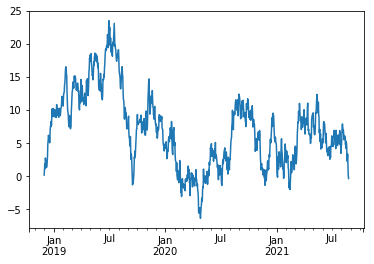

In [58]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('20181130', periods=1000))
ts = ts.cumsum()
from pylab import *
ts.plot()
show()

---
# 20.数据读写

### 数据读取

In [59]:
df6 = pd.read_csv('../res/pd_data.csv')
df6
df7 = pd.read_excel('../res/pd_data.xlsx')
df7

,Unnamed: 0,Date,A,B,C,D,E
0,0,20181101,23,95,10,43,24
1,1,20181102,12,56,6,16,55
2,2,20181103,34,34,43,42,78
3,3,20181104,55,65,82,15,53
4,4,20181105,13,75,23,67,98
5,5,20181106,43,72,52,47,59
6,6,20181107,54,27,23,48,70
7,7,20181108,6,19,15,34,32


,Date,A,B,C,D,E
0,20181101,23,95,10,43,24
1,20181102,12,56,6,16,55
2,20181103,34,34,43,42,78
3,20181104,55,65,82,15,53
4,20181105,13,75,23,67,98
5,20181106,43,72,52,47,59
6,20181107,54,27,23,48,70
7,20181108,6,19,15,34,32


### 数据写入

In [60]:
df6.to_csv('../res/pd_data1.csv')
df7.to_excel('../res/pd_data1.xlsx')